In [1]:
import sys
sys.path.append('/Users/wastechs/Documents/git-repos/energy-efficiency')
from validation.gp.create_train_inference import create_train_inference_gp
from lib.util import helper, data_preprocessing
import torch
import gpytorch

In [9]:
## Locally Periodic Kernel ##
period_constraint_short = gpytorch.constraints.Interval(0.001, 0.04) ## short term

seasonal_periodic_short = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.PeriodicKernel(
        period_length_constraint=period_constraint_short
        )
    )

seasonal_rbf_short = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RBFKernel()
)

locally_short_periodic = seasonal_periodic_short #* seasonal_rbf_short

period_constraint_long = gpytorch.constraints.Interval(0.176, 0.230) ## long term

seasonal_periodic_long = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.PeriodicKernel(
        #period_length_constraint=period_constraint_long
        )
    )

seasonal_rbf_long = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RBFKernel()
)

locally_long_periodic = seasonal_periodic_long #* seasonal_rbf_long

## Local Variations ##
local_variation_alpha = gpytorch.priors.GammaPrior(1, 0.5)
local_variation_lengthscale = gpytorch.priors.GammaPrior(1, 0.05)

local_variation = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RQKernel()
    )
    
local_variation.alpha = local_variation_alpha
local_variation.lengthscale = local_variation_lengthscale

local_variation_2 = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RBFKernel(
    )
)


covar_module = locally_short_periodic + locally_long_periodic #+ local_variation #+ local_variation_2

In [10]:
X_train, y_train, X_test, y_test, n_train = data_preprocessing.gp_preprocess('uv_sigma_line_eg_15T', 15, True)

Iter 1 , Loss = 1.501916209321723 , Noise = 0.6932471990585327
Iter 2 , Loss = 1.4724603249751584 , Noise = 0.7444966435432434
Iter 3 , Loss = 1.4413182077927713 , Noise = 0.7967812418937683
Iter 4 , Loss = 1.4252097223456206 , Noise = 0.847777247428894
Iter 5 , Loss = 1.418920183493251 , Noise = 0.8955948948860168
Iter 6 , Loss = 1.4167099714228513 , Noise = 0.9387463927268982
Iter 7 , Loss = 1.4159519206092848 , Noise = 0.9759577512741089
Iter 8 , Loss = 1.4168783340702085 , Noise = 1.0063385963439941
Iter 9 , Loss = 1.416534081832211 , Noise = 1.0295547246932983
Iter 10 , Loss = 1.415904722975575 , Noise = 1.0455174446105957
Iter 11 , Loss = 1.4154761333855657 , Noise = 1.054484486579895
Iter 12 , Loss = 1.4143493663377702 , Noise = 1.0570353269577026
Iter 13 , Loss = 1.4135469478918183 , Noise = 1.053890585899353
Iter 14 , Loss = 1.4132398452527044 , Noise = 1.0459246635437012
Iter 15 , Loss = 1.4118133652332345 , Noise = 1.0341241359710693
Iter 16 , Loss = 1.4098657483453587 , Noi

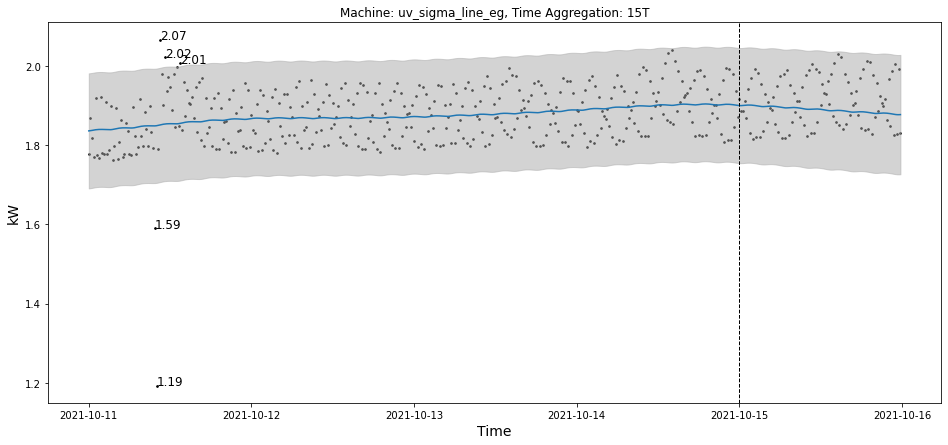

Paper Disposal Machine (Entsorgung)
-----------------------------------
Expected next day energy consumption    =  tensor(90.6880, dtype=torch.float64) kWh
Upper bound next day energy consumption =  tensor(97.7970, dtype=torch.float64) kWh
Lower bound next day energy consumption =  tensor(83.5790, dtype=torch.float64) kWh


In [11]:
model, likelihood, mse, mape, perf_dev_upper = create_train_inference_gp(
    kernel_gen=covar_module,
    train_x=X_train,
    train_y=y_train,
    test_x=X_test,
    test_y=y_test,
    n_train=n_train,
    time_agg='15T',
    machine='uv_sigma_line_eg',
    update_score=False
)   